In [15]:
import json

import matplotlib.pyplot as plt

In [27]:
instruct_eval_loss = []
instruct_train_loss = []
path_to_save_metrics = "../../../results/llama3_results/instruct/metrics"
steps = []
with open(path_to_save_metrics + "/trainer_state.json") as f:
    instruct_metrics = json.load(f)
    log_history = instruct_metrics["log_history"]

    for log in log_history:
        if "eval_loss" in log:
            instruct_eval_loss.append(log["eval_loss"])
            steps.append(log["step"])
        elif "loss" in log:
            instruct_train_loss.append(log["loss"])

In [28]:
assert len(instruct_eval_loss) == len(instruct_train_loss), "Length must match"
assert len(instruct_eval_loss) == len(steps), "Length must match"

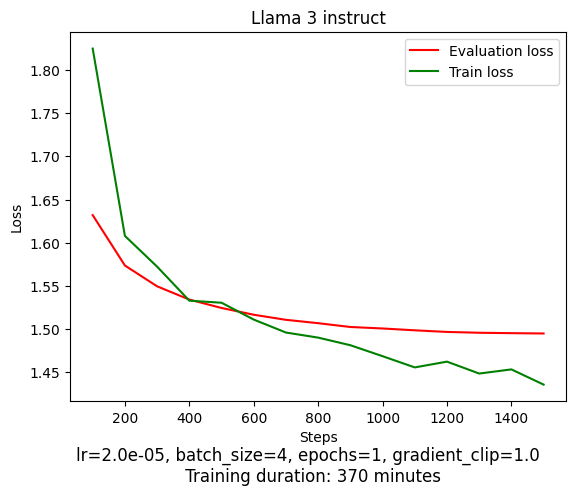

In [29]:
# Instruct finetuning metrics
fig, ax = plt.subplots()

ax.plot(steps, instruct_eval_loss, "r-", label="Evaluation loss")
ax.plot(steps, instruct_train_loss, "g-", label="Train loss")
ax.set_xlabel("Steps")
ax.set_ylabel("Loss", color="black")
ax.legend()
plt.title("Llama 3 instruct")
txt = "lr=2.0e-05, batch_size=4, epochs=1, gradient_clip=1.0 \n Training duration: 370 minutes"
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment="center", fontsize=12)

plt.savefig(path_to_save_metrics + "/graph_1_epoch.png")
plt.show()